# Map for KWood

In [1]:
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [6]:
filename='all.txt'
points=pd.read_csv(f'/Users/bell/in_and_outbox/2021/kwood/wmobulletin/replotforwmobulletin/{filename}',delimiter='\t',error_bad_lines=False,header=None,na_values=['        NA','      NA'])
points.tail()

b'Skipping line 121: expected 8 fields, saw 9\nSkipping line 338: expected 8 fields, saw 10\nSkipping line 426: expected 8 fields, saw 9\nSkipping line 560: expected 8 fields, saw 9\nSkipping line 589: expected 8 fields, saw 9\nSkipping line 591: expected 8 fields, saw 9\nSkipping line 640: expected 8 fields, saw 10\nSkipping line 1320: expected 8 fields, saw 9\nSkipping line 1322: expected 8 fields, saw 9\nSkipping line 4688: expected 8 fields, saw 11\nSkipping line 5646: expected 8 fields, saw 9\nSkipping line 17599: expected 8 fields, saw 9\nSkipping line 18048: expected 8 fields, saw 9\nSkipping line 23357: expected 8 fields, saw 10\nSkipping line 23358: expected 8 fields, saw 10\nSkipping line 23359: expected 8 fields, saw 10\nSkipping line 23360: expected 8 fields, saw 10\nSkipping line 23361: expected 8 fields, saw 10\nSkipping line 23362: expected 8 fields, saw 10\nSkipping line 23363: expected 8 fields, saw 10\nSkipping line 23364: expected 8 fields, saw 10\nSkipping line 2336

,0,1,2,3,4,5,6,7
82066,22/01/1919,NaN,NaN,8.9,-79.6 at dry dock 1 balboa panama,NaN,NaN,balboa
82067,23/01/1919,NaN,NaN,8.9,-79.6 commences and until 4 am in dry ...,NaN,NaN,balboa
82068,23/01/1919,NaN,NaN,8.9,-79.6 at dry dock 1 balboa panama,NaN,NaN,balboa
82069,29/01/1919,NaN,NaN,NaN,120.4,420 montuosa island disappeared off star...,NaN,rose island
82070,31/01/1919,NaN,NaN,NaN,41.7,at 700 sighted mtmomotombo bearing 3 poi...,NaN,tolo harbor


In [7]:
points.rename(columns={1: "lat", 2: "lon"},inplace=True)

In [8]:
#ports

"""points[points[3]<0] = np.nan
points.dropna(subset=[3,4], inplace=True)
points.drop_duplicates(subset=[3,4], inplace=True)
points
lon=points[4]
lat=points[3]"""

'points[points[3]<0] = np.nan\npoints.dropna(subset=[3,4], inplace=True)\npoints.drop_duplicates(subset=[3,4], inplace=True)\npoints\nlon=points[4]\nlat=points[3]'

In [9]:
#at sea
#some are decimal, some are deg min
points.dropna(subset=['lat','lon'], inplace=True)
points.drop_duplicates(subset=['lat','lon'], inplace=True)

In [10]:
points['latitude'] = np.nan
points['longitude'] = np.nan

for row, value in points.iterrows():
    latstring=value['lat'].split()
    lonstring=value['lon'].split()
    #print(latstring,lonstring)
    if (len(latstring) == 3) and (latstring[-1] == 'N'):
        if lonstring[-1] == 'W':
            points['longitude'][row] = -1*float(lonstring[0])+float(lonstring[1])/60
            points['latitude'][row] = float(latstring[0])+float(latstring[1])/60
        elif lonstring[-1] == 'E':
            points['latitude'][row] = float(latstring[0])+float(latstring[1])/60
            points['longitude'][row] = float(lonstring[0])+float(lonstring[1])/60
        #deg min hemi
    elif (len(latstring) == 2) and (latstring[-1] == 'N'):
        if lonstring[-1] == 'W':
            points['longitude'][row] = -1*float(lonstring[0])
            points['latitude'][row] = float(latstring[0])
        elif lonstring[-1] == 'E':
            points['longitude'][row] = float(lonstring[0])
            points['latitude'][row] = float(latstring[0])
        #deg min hemi 

    elif (len(latstring) == 3) and (latstring[-1] == 'S'):
        if lonstring[-1] == 'W':
            points['longitude'][row] = -1*float(lonstring[0])+float(lonstring[1])/60
            points['latitude'][row] = -1*float(latstring[0])+float(latstring[1])/60
        elif lonstring[-1] == 'E':
            points['latitude'][row] = -1*float(latstring[0])+float(latstring[1])/60
            points['longitude'][row] = float(lonstring[0])+float(lonstring[1])/60
        #deg min hemi
    elif (len(latstring) == 2) and (latstring[-1] == 'S'):
        if lonstring[-1] == 'W':
            points['longitude'][row] = -1*float(lonstring[0])
            points['latitude'][row] = -1*float(latstring[0])
        elif lonstring[-1] == 'E':
            points['longitude'][row] = float(lonstring[0])
            points['latitude'][row] = -1*float(latstring[0])


<ipython-input-10-52789a05654a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['longitude'][row] = -1*float(lonstring[0])+float(lonstring[1])/60
<ipython-input-10-52789a05654a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['latitude'][row] = float(latstring[0])+float(latstring[1])/60
<ipython-input-10-52789a05654a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['longitude'][row] = -1*float(lonstring[0])+f

In [12]:
points_2=pd.read_csv('/Users/bell/in_and_outbox/2021/kwood/wmobulletin/replotforwmobulletin/Unique_posns.txt',header=None,names=['latitude','longitude'],delimiter='\t')

In [14]:
points_3=pd.read_csv('/Users/bell/in_and_outbox/2021/kwood/wmobulletin/replotforwmobulletin/SWD_psn_18000.csv',header=None,names=['lat','lon'],delimiter='\t')
points_3.dropna(inplace=True)
points_3.drop_duplicates(inplace=True)

In [15]:
points_3['latitude'] = np.nan
points_3['longitude'] = np.nan

for row, value in points_3.iterrows():
    latstring=value['lat'].split()
    lonstring=value['lon'].split()
    #print(latstring,lonstring)
    if (len(latstring) == 3) and (latstring[-1] == 'N'):
        if lonstring[-1] == 'W':
            points_3['longitude'][row] = -1*float(lonstring[0])+float(lonstring[1])/60
            points_3['latitude'][row] = float(latstring[0])+float(latstring[1])/60
        elif lonstring[-1] == 'E':
            points_3['latitude'][row] = float(latstring[0])+float(latstring[1])/60
            points_3['longitude'][row] = float(lonstring[0])+float(lonstring[1])/60
        #deg min hemi
    elif (len(latstring) == 2) and (latstring[-1] == 'N'):
        if lonstring[-1] == 'W':
            points_3['longitude'][row] = -1*float(lonstring[0])
            points_3['latitude'][row] = float(latstring[0])
        elif lonstring[-1] == 'E':
            points_3['longitude'][row] = float(lonstring[0])
            points_3['latitude'][row] = float(latstring[0])
        #deg min hemi 

    elif (len(latstring) == 3) and (latstring[-1] == 'S'):
        if lonstring[-1] == 'W':
            points_3['longitude'][row] = -1*float(lonstring[0])+float(lonstring[1])/60
            points_3['latitude'][row] = -1*float(latstring[0])+float(latstring[1])/60
        elif lonstring[-1] == 'E':
            points_3['latitude'][row] = -1*float(latstring[0])+float(latstring[1])/60
            points_3['longitude'][row] = float(lonstring[0])+float(lonstring[1])/60
        #deg min hemi
    elif (len(latstring) == 2) and (latstring[-1] == 'S'):
        if lonstring[-1] == 'W':
            points_3['longitude'][row] = -1*float(lonstring[0])
            points_3['latitude'][row] = -1*float(latstring[0])
        elif lonstring[-1] == 'E':
            points_3['longitude'][row] = float(lonstring[0])
            points_3['latitude'][row] = -1*float(latstring[0])


<ipython-input-15-91fc4877bae1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_3['longitude'][row] = -1*float(lonstring[0])
<ipython-input-15-91fc4877bae1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_3['latitude'][row] = float(latstring[0])
<ipython-input-15-91fc4877bae1>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_3['longitude'][row] = -1*float(lonstring[0])
<ipython-input-15-91fc4877bae1>:36: Setti

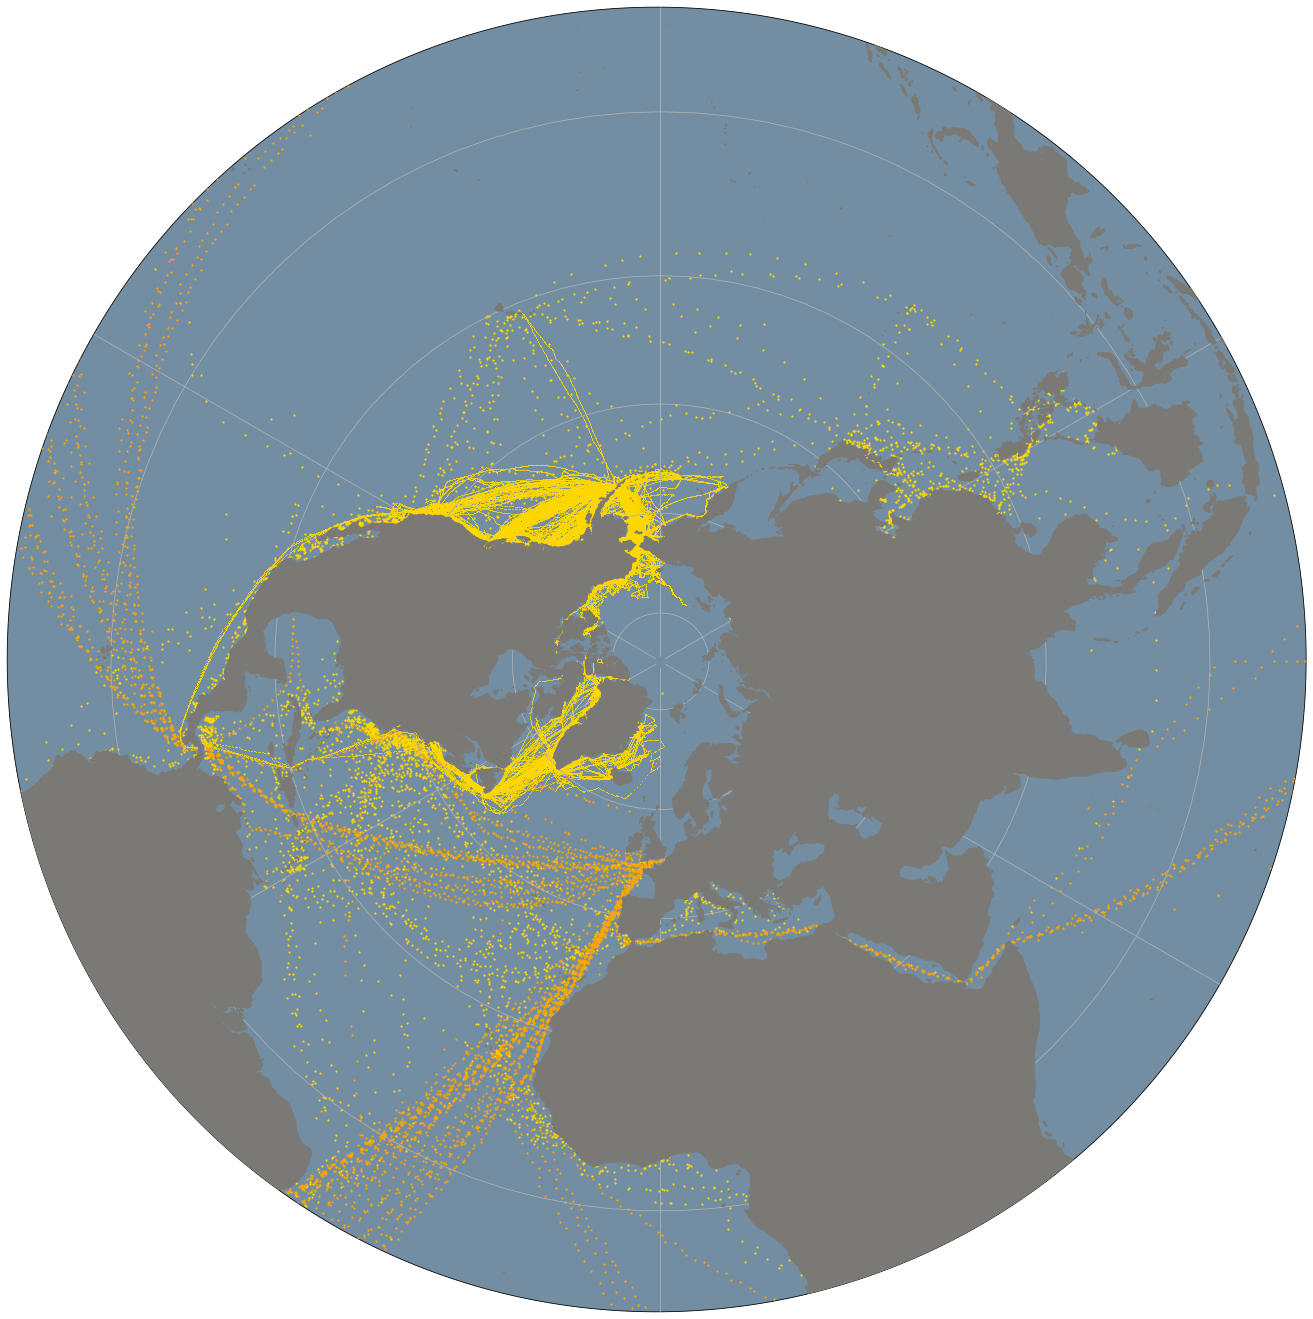

In [16]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(24, 24),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

projection=ccrs.NorthPolarStereo(true_scale_latitude=0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 10000)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines(zorder=3)
ax.add_feature(ocean_50m,color='#738ea2')


ax.scatter(points['longitude'],points['latitude'],s=5,facecolor='#ffd700',linewidth=0.005,edgecolors=None,transform=ccrs.PlateCarree(),zorder=3)
ax.scatter(points_2['longitude'],points_2['latitude'],s=1,facecolor='#ffd700',linewidth=0.005,edgecolors=None,transform=ccrs.PlateCarree(),zorder=3)
ax.scatter(points_3['longitude'],points_3['latitude'],s=5,facecolor='#FFA500',linewidth=0.005,edgecolors=None,transform=ccrs.PlateCarree(),zorder=3)
ax.set_extent([-180, 180, -10, 90], ccrs.PlateCarree())

ax.add_feature(land_50m,color='#7b7975',zorder=3)

fig.savefig(filename.replace('txt','png'),dpi=300)
fig.savefig(filename.replace('txt','svg'),dpi=300)

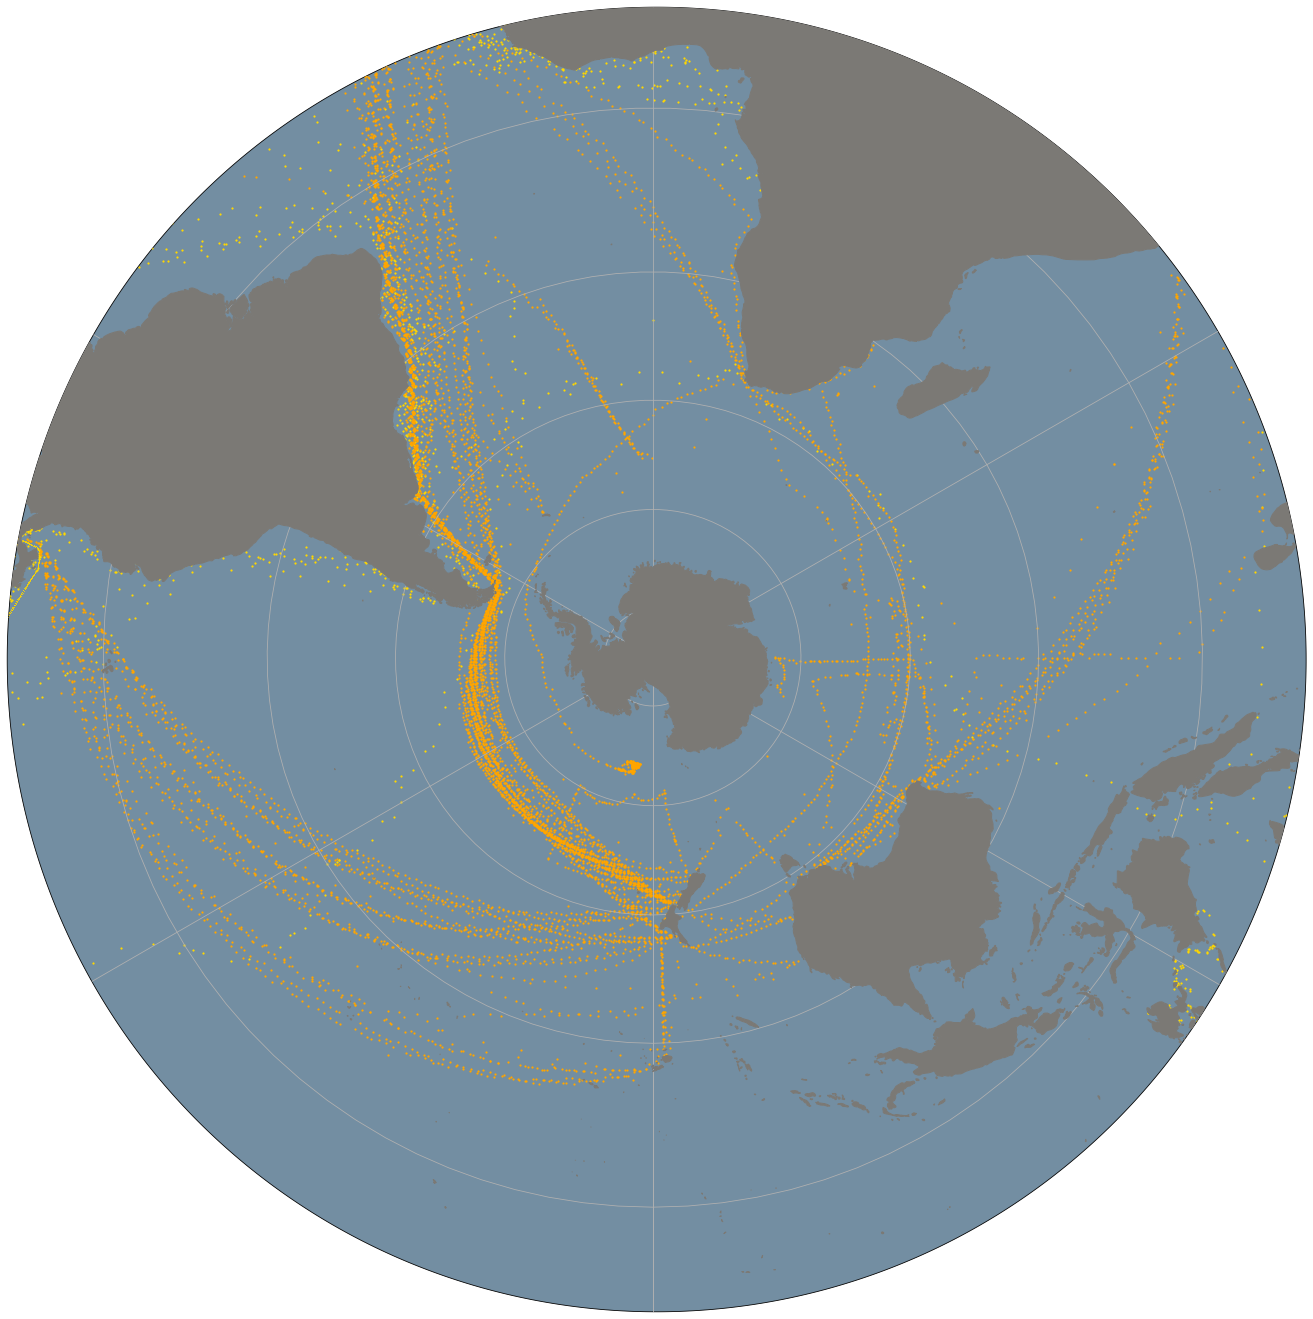

In [17]:
#southern hem
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(24, 24),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

projection=ccrs.SouthPolarStereo(true_scale_latitude=0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 10000)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.gridlines(zorder=3)
ax.add_feature(ocean_50m,color='#738ea2')

ax.scatter(points['longitude'],points['latitude'],s=5,facecolor='#ffd700',linewidth=0.005,edgecolors=None,transform=ccrs.PlateCarree(),zorder=3)
ax.scatter(points_2['longitude'],points_2['latitude'],s=1,facecolor='#ffd700',linewidth=0.005,edgecolors=None,transform=ccrs.PlateCarree(),zorder=3)
ax.scatter(points_3['longitude'],points_3['latitude'],s=5,facecolor='#FFA500',linewidth=0.005,edgecolors=None,transform=ccrs.PlateCarree(),zorder=3)
ax.set_extent([-180, 180, -90, 10], ccrs.PlateCarree())

ax.add_feature(land_50m,color='#7b7975',zorder=3)

fig.savefig(filename.replace('txt','SH.png'),dpi=300)
fig.savefig(filename.replace('txt','SH.svg'),dpi=300)